<a href="https://colab.research.google.com/github/lalalalalala-hi/AI-and-Machine-Learning/blob/main/Image_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library
* os - OS interaction (file navigation)
* json - JSON parsing (read/write JSON files)
* numpy - Array/matrix operations
* pandas - Data manipulation and analysis
* matplotlib.pyplot - Plotting
* matplotlib.image - Image reading and displaying
* tensorflow - Machine learning and deep learning

In [ ]:
!pip install kaggle

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

# Download Dataset from Kaggle

In [ ]:
# Move kaggle.json to the correct location
os.makedirs('/root/.kaggle/', exist_ok=True)
!mv kaggle.json /root/.kaggle/

# Ensure the permissions are correct
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

# Unzip the downloaded dataset
!unzip fruit-and-vegetable-image-recognition.zip -d fruit-and-vegetable-image-recognition

# List files in the current directory
!ls

# List files in the fruit-and-vegetable-image-recognition directory
!ls fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:16<00:00, 46.9MB/s]
100% 1.98G/1.98G [00:16<00:00, 132MB/s] 
Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: fruit-and-vegetable-image-recognition/test/apple/Image_1.jpg  
  inflating: fruit-and-vegetable-image-recognition/test/apple/Image_10.jpg  
  inflating: fruit-and-vegetable-image-recognition/test/apple/Image_2.jpg  
  inflating: fruit-and-vegetable-image-recognition/test/apple/Image_3.jpg  
  inflating: fruit-and-vegetable-image-recognition/test/apple/Image_4.jpg  
  inflating: fruit-and-vegetable-image-recognition/test/apple/Image_5.jpg  
  inflating: fruit-and-vegetable-image-recognition/test/apple/Image_6.JPG  
  inflating: fruit-and-vegetable-image-recognition/test/apple/Image_7.jpg  
  inflating: fruit-and-vegetable-image-recognition/test/apple/Image_8.jpg  
  inflating: fruit-and-vegetable-image-recognition/test/apple/Image

In [ ]:
# Set the paths
train_dir = 'fruit-and-vegetable-image-recognition/train'
validation_dir = 'fruit-and-vegetable-image-recognition/validation'

# Image Augmentation
 Image augmentation is a technique used to artificially expand the size of a training dataset for deep learning models by applying random transformations to existing images. This helps in improving the generalization and robustness of the model.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_set = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2510 images belonging to 36 classes.
Found 63 images belonging to 36 classes.


# Convolutional Neural Network (CNN)
CNN architecture is designed for tasks like image classification, where convolutional layers extract features from images, pooling layers reduce spatial dimensions, dropout helps prevent overfitting, and fully connected layers learn patterns for classification.

In [ ]:
# Initialize the CNN
cnn = tf.keras.models.Sequential()

# First Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),  # Most common size for kernels is 3x3
    activation="relu",  # Activation function
    input_shape=(64, 64, 3)  # Input shape (64x64 image with 3 color channels - RGB)
))

# First Pooling Layer (2x2 pooling size)
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2
))

# Second Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),  # Most common size for kernels is 3x3
    activation="relu"
))

# Second Pooling Layer (2x2 pooling size)
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2
))

# Dropout Layer to prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.5))

# 6. Flattening Layer
cnn.add(tf.keras.layers.Flatten())

# Fully Connected (Dense) Layer
cnn.add(tf.keras.layers.Dense(
    units=128,
    activation="relu"
))

# Output Layer
cnn.add(tf.keras.layers.Dense(
    units=36,  # Number of classes in the dataset
    activation="softmax"
))

In [ ]:
# Compile the CNN
cnn.compile(
    optimizer='adam',  # Optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Performance metric
)

# Display the model's architecture
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [ ]:
# Training the CNN
history = cnn.fit(
    training_set,
    validation_data=validation_set,
    epochs=32
)

Epoch 1/32
79/79 [==============================] - 96s 1s/step - loss: 1.0243 - accuracy: 0.6769 - val_loss: 0.8456 - val_accuracy: 0.7460
Epoch 2/32
79/79 [==============================] - 89s 1s/step - loss: 0.9089 - accuracy: 0.7151 - val_loss: 0.6332 - val_accuracy: 0.8571
Epoch 3/32
79/79 [==============================] - 91s 1s/step - loss: 0.8539 - accuracy: 0.7231 - val_loss: 0.6179 - val_accuracy: 0.8095
Epoch 4/32
79/79 [==============================] - 91s 1s/step - loss: 0.8370 - accuracy: 0.7375 - val_loss: 0.7723 - val_accuracy: 0.8413
Epoch 5/32
79/79 [==============================] - 89s 1s/step - loss: 0.7804 - accuracy: 0.7546 - val_loss: 0.5262 - val_accuracy: 0.8730
Epoch 6/32
79/79 [==============================] - 90s 1s/step - loss: 0.7553 - accuracy: 0.7542 - val_loss: 0.6535 - val_accuracy: 0.8571
Epoch 7/32
79/79 [==============================] - 90s 1s/step - loss: 0.7420 - accuracy: 0.7542 - val_loss: 0.5184 - val_accuracy: 0.8254
Epoch 8/32
79/79 [==

# Model Evaluation
Model Evaluation involves assessing the performance of the trained Convolutional Neural Network (CNN) on both the training and validation datasets.

In [ ]:
#Training dataset Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

79/79 [==============================] - 73s 924ms/step - loss: 0.1849 - accuracy: 0.9438
Training accuracy: 0.9438247084617615


In [ ]:
#Validation dataset Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2/2 [==============================] - 2s 1s/step - loss: 0.5570 - accuracy: 0.9048
Validation accuracy: 0.9047619104385376


# Visualization
Visualization involves plotting the training and validation accuracy over a series of epochs to visually assess the performance and learning progress of the model.

In [ ]:
history.history['accuracy']

[0.6768924593925476,
 0.7151394486427307,
 0.7231075763702393,
 0.7374501824378967,
 0.7545816898345947,
 0.754183292388916,
 0.754183292388916,
 0.7665338516235352,
 0.7729083895683289,
 0.7796812653541565,
 0.7796812653541565,
 0.7896414399147034,
 0.7904382348060608,
 0.8059760928153992,
 0.8119521737098694,
 0.8402390480041504,
 0.84183269739151,
 0.8342629671096802,
 0.8310756683349609,
 0.8314741253852844,
 0.8350597620010376,
 0.8410358428955078,
 0.8462151288986206,
 0.8438246846199036,
 0.8498008251190186,
 0.864143431186676,
 0.8701195120811462,
 0.8764940500259399,
 0.8701195120811462,
 0.8621513843536377,
 0.8681274652481079,
 0.8812748789787292]

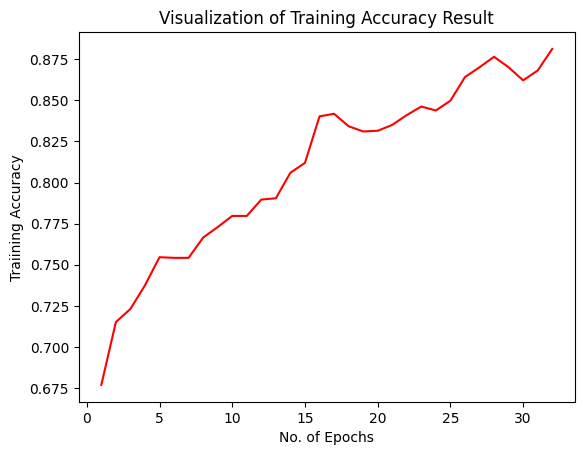

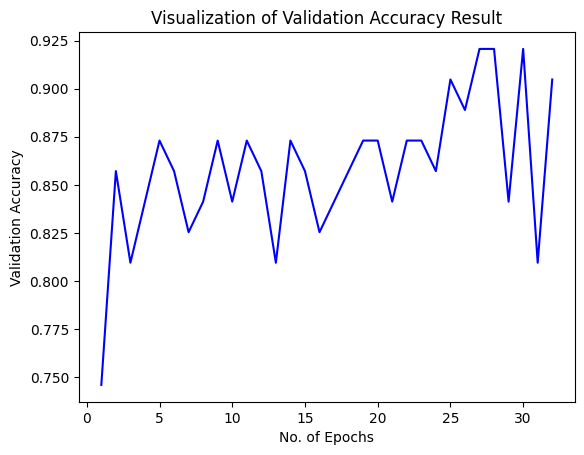

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

plt.plot(epochs,history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()